## `Text Processing`

In [1]:
# NLTK ---> Natural Language Tool Kit.

In [1]:
# Importing Necessary Packages.
import nltk
import string
import re

### `Text Lowercase.`
- Lowercasing is necessary to reduce the size of the vocabulary of our texts.

In [5]:
def lower_case(text):
    return text.lower()

inp_str = 'The Climate is Windy and Cloudy. There is Possibility of Rain IN the City'
lower_case(inp_str)

'the climate is windy and cloudy. there is possibility of rain in the city'

### `Numbers Removal`
- Numerical digits should be removed as a part of preprocessing. For this we use Regular Expressions(re) to remove the numbers.

In [4]:
def number_removal(text):
    log = re.sub(r'\d+',' ', text) # sub means subtract, 'd' is the pattern to remove numbers,
    return log

In [5]:
inp_num = 'We bought 6 dozens of mangoes which are totally 72 of it and shared those among 9 members'
number_removal(inp_num)

'We bought   dozens of mangoes which are totally   of it and shared those among   members'

- Numbers can be converted into texts using a `'inflect'` library.

In [6]:
import inflect
f =inflect.engine()

# Converting number to text.
def number_text(text):
    temp_string = text.split() # Individually splitting into each unit
    new_str = []

    for word in temp_string:
        # If text is a digit, then it converts that to a number and then appends to 'new_str' list.
        if word.isdigit(): # If a word is a digit,
            temp = f.number_to_words(word)
            new_str.append(temp)
        # else it directly appends to the list.    
        else:
            new_str.append(word)
            
    # Joining the new texts as it was earlier.
    temp_str = ' '.join(new_str)
    return temp_str

inp_num_str = 'We bought 6 dozens of mangoes which are totally 72 of it'
number_text(inp_num_str)

'We bought six dozens of mangoes which are totally seventy-two of it'

### `Punctuation Removal.`
-  We ideally remove punctuations because we donot have different form of the same word. If we don't remove, then same words with punctuation will be treated seperately.

In [7]:
def punct_removal(text):
    translator = str.maketrans('','', string.punctuation) # maketrans function and using ''.punctuation' parameter we remove punctuations. 
    return text.translate(translator)

inp_punct = 'Hey!, Are you excited?, After a week, we will be in London!!!'
punct_removal(inp_punct)

# In '.maketrans' means make make translation. It has many parameters inside this function.

'Hey Are you excited After a week we will be in London'

### `Removal of Default Stopwords.`
- Stopwords are the words that don't contribute to the meaning of the sentances. NLTK has set of default stopwords and can be used to remove stopwords from our text and return a list of word tokens.

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_text =[]
for word in word_token():
    if word not in stop_words:
        filtered_text.append(word)     

In [8]:
from nltk.corpus import stopwords # corpus means dataset.
from nltk.tokenize import word_tokenize
# 'Word tokenize': We use the word_tokenize() method to split a sentence into tokens or words.
# 'Sentence tokenize': We use the sent_tokenize() method to split a document or paragraph into sentences.

nltk.download('stopwords')
nltk.download('punkt')

# Removing stopwords using function.
def stopwords_removal(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    filtered_text = ' '.join(filtered_text) # To join the tokens.
    print(stop_words)
    return filtered_text

inp_word = 'Data science is all about insights from the data. It is the new technology in the IT industry'
stopwords_removal(inp_word)

{'most', 'some', 'being', 'me', 'its', 'd', "won't", 'am', 'are', 'each', "mustn't", 'yourselves', 'than', 'myself', 'was', 'had', 'very', 'be', 'mightn', 'into', 'that', "doesn't", 'up', "isn't", 'wouldn', 'don', 'i', 'a', 'by', 'same', 'been', 'but', 'during', 'under', "don't", 'couldn', "you'd", 'll', 'ma', 'won', 'after', 'her', 'an', 'while', 'have', 'other', "didn't", "should've", 'shouldn', 'own', 'about', 'out', 'the', 'yours', "shan't", "mightn't", 'who', 'do', 'why', 'these', 'should', 'were', "aren't", 'ours', 'haven', 'because', 'for', 'will', 'above', "that'll", "it's", 'as', 'himself', 'having', 'more', 'not', 'before', 've', 'off', "couldn't", 'if', 'on', 'to', 'doing', 'down', 'here', 'and', 'just', 'doesn', "wasn't", 'themselves', "wouldn't", 'at', 'over', 'she', 'so', 'didn', 'in', 'or', 'between', 'herself', 'has', "hadn't", 'from', 'no', 'only', 'further', "needn't", 's', 'is', 'y', 'ourselves', 'below', 'through', 'such', 'wasn', 'isn', 'hers', 'him', 'nor', 'this'

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


'Data science insights data . It new technology IT industry'

### `Stemming.`
- Stemming is the process of getting the `root form` of the word. Root or Stem is the part to which inflextional affixes (such as ed, ize, es) etc. are added. We create the stem words by removing the prefix of suffix of the word.
- Here it converts the words to it's base form. 
- For instance: Mangoes ---> Mango
                Boys ---> Boy
                Going ---> Go
  
- The sentances need to be converted into tokens. These tokens again it can be converted into thier root form.The different types of Stemming are Porter Stemming, Snowball Stemming and Lancaster Stemming. Generally Porter Stemming is preferred.

In [9]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stem_1 = PorterStemmer()

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem_1.stem(word) for word in word_tokens]
    return stems

inp_stem = "Data science is the new revolutions in the world, for a particular day an individual generates terabytes of the data"
stem_words(inp_stem)

['data',
 'scienc',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'world',
 ',',
 'for',
 'a',
 'particular',
 'day',
 'an',
 'individu',
 'gener',
 'terabyt',
 'of',
 'the',
 'data']

### `Lemmatization.`
- Lemmatization is similar to stemming but the only difference is lemmatization ensures that root word belongs to the same language. In NLTK we use `'WordLemmatizer'` to get the lemmas of words. We need to provide the context for the lemmatization hence pos (parts-of-speech)  is added as a parameter.

In [10]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize

lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')

# Lemmatize string.
def word_lemmatize(text):
    word_tokens = word_tokenize(text) # tokening the sentance.
    
    lemmas = [lemma.lemmatize(word, pos = 'v') for word in word_tokens]
    return lemmas

inp_lemma = "Data scientist profession is the latest trending occupation in the world, many countries has a huge requirments in their companies"
word_lemmatize(inp_lemma)

[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


['Data',
 'scientist',
 'profession',
 'be',
 'the',
 'latest',
 'trend',
 'occupation',
 'in',
 'the',
 'world',
 ',',
 'many',
 'countries',
 'have',
 'a',
 'huge',
 'requirments',
 'in',
 'their',
 'company']

### `Parts of Speech(POS) Tagging`.
- The pos explains how a word can be used in a sentance. Each word has different contexts and semantic meanings. The basic NLP models like bag-of-words(bow) fails to identify these relation between the words. For that we use pos tagging to mark a word to its pos tag based on its context in the data. POS is also used to extract the relationship between the words.

In [11]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# converting text to word_tokens with their tags.
def pos_tags(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tags('Are you afraid of Artificial Intelligence?')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10054] An existing connection was forcibly
[nltk_data]     closed by the remote host>


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('Artificial', 'NNP'),
 ('Intelligence', 'NNP'),
 ('?', '.')]

### `Chunking.`
- Chunking the process of extracting phrases from the Unstructured text and returns them in structural format. It is also called as `Shallow Parsing`. It groups words into chunks mainly for noun phrases. It can also achieved using regex also.

In [12]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def chunking(text, grammar):
    word_tokens = word_tokenize(text)
    
    # labeling words with pos
    word_pos = pos_tag(word_tokens)
    
    # creating a chunk parser using grammar
    chunk_parser = nltk.RegexpParser(grammar) 
    
    # Testing it with list of word tokens with tagged pos
    tree = chunk_parser.parse(word_pos)
    
    for subtree in tree.subtrees():
        print(subtree)
    # tree.draw()

inp_chunk = 'the little red parrot is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(inp_chunk,grammar)

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


JJ means Adjective
NN means Noun
VBZ means Verb

### `Name Entity Recognition`
- `NER` is used to extract information from unstructured text. It is used to classify the entities which are present in text into different categories like person, organisation, event, place etc. This provides detailed insights of the text and the relationship between the different entities.

In [13]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

def word_ner(text):
    word_token = word_tokenize(text)
    
    word_pos = pos_tag(word_token)
    print(ne_chunk(word_pos))
    
inp_ner = ' Elon Musk is hte richest person in the world. He owns Tesla,Twitter, SpaceX, Neuralink and many more'
word_ner(inp_ner)

[nltk_data] Error loading maxent_ne_chunker: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


(S
  (PERSON Elon/NNP)
  (ORGANIZATION Musk/NNP)
  is/VBZ
  hte/JJ
  richest/JJS
  person/NN
  in/IN
  the/DT
  world/NN
  ./.
  He/PRP
  owns/VBZ
  (PERSON Tesla/NNP)
  ,/,
  (PERSON Twitter/NNP)
  ,/,
  (ORGANIZATION SpaceX/NNP)
  ,/,
  (PERSON Neuralink/NNP)
  and/CC
  many/JJ
  more/JJR)


[nltk_data] Error loading words: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [14]:
### `More on 'Regex'`

### `Text Normalization`.
- Text normalization is the process of transforming the text into the canonical (standard) form. For instance 'ok' and 'K' can be transformed into 'Okay'. 'pre-processing', ''prepricessing' and 'pre processing' into just "preprocessing".
- Text normalization is much useful in dealing with social media text /comments in blogs, text messages etc. where many abbreviations, shortcuts, misspell etc happens.


  - 2moro, 2mrw, 2morrow, 2mrrw, tmrw, tomrw ----> Tomorrow
  - b4 -----> Before
  - otw-----> On the way
  - :), :-)---> Smile

**`Effects of Normalization`**
- It's more effective for analyzing unstructured data. It helps in topic extraction where near synonyms and spelling differences are common.
- Unlike stemming and lemmatization, there is no standard way to normalize the text.
- Some of the general methods of text normalization includes 'dictionary mapping', 'statistical machine translation (SMT)' and spelling-correction based approaches.

### `Word Count`.
- With this it helps to understand and find how many times each tokens(words) appeared in the text.

In [15]:
from nltk.tokenize.regexp import WhitespaceTokenizer
a = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection', the prime minister tweeted"

In [16]:
tokens = WhitespaceTokenizer().tokenize(a)
print(tokens)
print('*********************************************************')
print(len(tokens))

["'There", 'is', 'no', 'need', 'to', 'panic.', 'We', 'need', 'to', 'work', 'together,', 'take', 'small', 'yet', 'important', 'measures', 'to', 'ensure', "self-protection',", 'the', 'prime', 'minister', 'tweeted']
*********************************************************
23


In [17]:
# This tries to remove duplicates.
my_vocab = set(tokens)
print(len(my_vocab))

20


In [18]:
# Here we'll try word punctuation tokenizer.
from nltk.tokenize import WordPunctTokenizer

In [19]:
word_punct = WordPunctTokenizer().tokenize(a)
print(len(word_punct))
print('***************')
print(word_punct)

29
***************
["'", 'There', 'is', 'no', 'need', 'to', 'panic', '.', 'We', 'need', 'to', 'work', 'together', ',', 'take', 'small', 'yet', 'important', 'measures', 'to', 'ensure', 'self', '-', 'protection', "',", 'the', 'prime', 'minister', 'tweeted']


- Here it includes punctuation symbols as an individual token

### `Frequency Distribution `.
- This basically counts the words present in our text.
- It tells how many times particular word is occuring out of total provided words.

In [20]:
a = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection', the prime minister tweeted"
freq_dist = nltk.FreqDist(word_tokenize(a))
print(freq_dist)

<FreqDist with 23 samples and 27 outcomes>


In [21]:
print(freq_dist['panic'])
print(freq_dist['to'])
print(freq_dist['the'])
print(freq_dist['person'])

1
3
1
0


In [22]:
# This provides all the tokenized data.
print(freq_dist.keys())

dict_keys(["'There", 'is', 'no', 'need', 'to', 'panic', '.', 'We', 'work', 'together', ',', 'take', 'small', 'yet', 'important', 'measures', 'ensure', 'self-protection', "'", 'the', 'prime', 'minister', 'tweeted'])


In [23]:
print(freq_dist['.'])

1


### `Frequency Distribution Plot`.

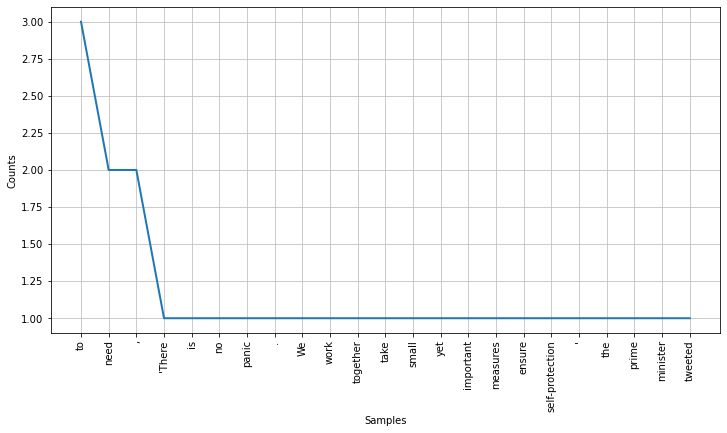

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
freq_dist.plot()

### `Personal Frequency Distribution`.
- It's helpful when we need to do frequency distribution based on personal text.

In [25]:
from nltk import FreqDist
b = "'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.'"
b_split = b.split()

freqDist = FreqDist(b_split)
tokens = list(freqDist.keys())
print(tokens)
print('****************************************************8')
print(freqDist['science'])

["'Data", 'science', 'is', 'an', 'interdisciplinary', 'field', 'that', 'uses', 'scientific', 'methods,', 'processes,', 'algorithms', 'and', 'systems', 'to', 'extract', 'knowledge', 'insights', 'from', 'noisy,', 'structured', 'unstructured', 'data,[1][2]', 'apply', 'data', 'across', 'a', 'broad', 'range', 'of', 'application', 'domains.', 'Data', 'related', 'mining,', 'machine', 'learning', 'big', "data.'"]
****************************************************8
2


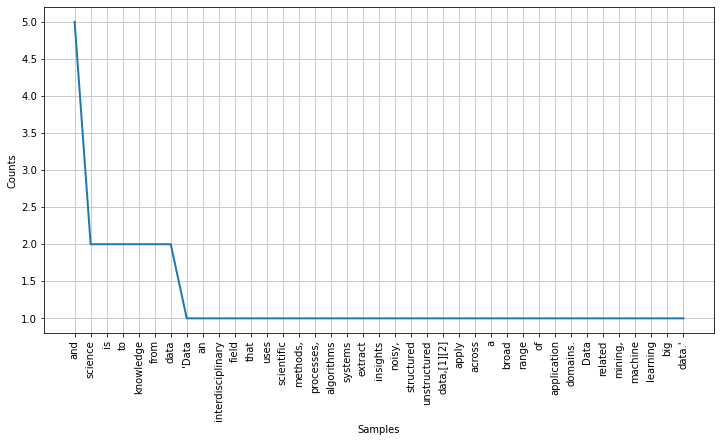

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
plt.figure(figsize = (12,6))
freqDist.plot()

### `Name Entities`.
- A Named Entity is a "real-world object" that's assigned a name, a person, a country, a product etc. SpaCy can recognize various types of named entities in a document by asking a model for prediction. Models in general depends on statistical and depends on the examples they were trained on, they always doesn't work prefectly sometimes they need hyper parameter tuning.

In [27]:
import spacy

## `TextBlob`: Simplified Text Processing
- Textblob is a python library for processing textual data. It provides a simple API for solving common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentimental analysis, classification, translation, etc. This library is built on NLTK library.

### Features
- Noun Phrase Extraction
- Part-of Speech Tagging
- Sentimental Analysis
- Classification
- Language Translation and Detection powered by Google Translate
- Tokenization
- Word & Phrase Frequencies
- Parsing
- n-grams
- Word Inflection(Pluralization & Singularization) and Lemmatization
- Spelling Correction
- Adding new models or languages through extentions
- Wordnet Integration

In [28]:
# Creating a Textblob.
from textblob import TextBlob

In [29]:
inp_txt = TextBlob('I love Natural Language Processing more than you!. Myself Ahmed. I work at Hewlett Packard Enterprise')

Using TextBlob package we should be able to fetch different properties of the texts.

In [30]:
# Fetching Parts-of-Speech of each word as 'Tags'.
inp_txt.tags

[('I', 'PRP'),
 ('love', 'VBP'),
 ('Natural', 'JJ'),
 ('Language', 'NNP'),
 ('Processing', 'NNP'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('you', 'PRP'),
 ('Myself', 'NNP'),
 ('Ahmed', 'NNP'),
 ('I', 'PRP'),
 ('work', 'VBP'),
 ('at', 'IN'),
 ('Hewlett', 'NNP'),
 ('Packard', 'NNP'),
 ('Enterprise', 'NNP')]

### 1. `Noun Phrase Extraction.`

In [31]:
inp_txt.noun_phrases

WordList(['language processing', 'myself ahmed', 'hewlett packard enterprise'])

### 2. `Sentimental Analysis`.
- This property returns a named tuple of Sentiment (Polarity , Subjectivity). The polarity score is a float within the range -1.0 to 1.0. The subjectivity is a float within the range 0.0 to 1.0 whereas, 0.0 is very objective and 1.0 is very subjective.

In [32]:
inp_sent = TextBlob("Textblob is an amazing library and very friendly to use.")

In [33]:
print(inp_sent.sentiment)
print(inp_sent.sentiment.subjectivity)
print(inp_sent.sentiment.polarity)

Sentiment(polarity=0.5437500000000001, subjectivity=0.775)
0.775
0.5437500000000001


### 3. `Tokenization`.

In [34]:
# Tokenization using TextBlob.
inp_token = TextBlob('AI is the ability of a computer or a robot controlled by a computer to do tasks that are usually done by humans because they require human intelligence and discernment')
inp_token.words

WordList(['AI', 'is', 'the', 'ability', 'of', 'a', 'computer', 'or', 'a', 'robot', 'controlled', 'by', 'a', 'computer', 'to', 'do', 'tasks', 'that', 'are', 'usually', 'done', 'by', 'humans', 'because', 'they', 'require', 'human', 'intelligence', 'and', 'discernment'])

In [35]:
inp_sent = TextBlob('Data Science is all about data. It helps in improvising the business profits. Statistics and Machine learning are the two important aspects of data science.')
print(inp_sent.words)
print("**********************************************************************************************************************")
print(inp_sent.sentences)

['Data', 'Science', 'is', 'all', 'about', 'data', 'It', 'helps', 'in', 'improvising', 'the', 'business', 'profits', 'Statistics', 'and', 'Machine', 'learning', 'are', 'the', 'two', 'important', 'aspects', 'of', 'data', 'science']
**********************************************************************************************************************
[Sentence("Data Science is all about data."), Sentence("It helps in improvising the business profits."), Sentence("Statistics and Machine learning are the two important aspects of data science.")]


### 4. `Word Inflection and Lemmatization`.

In [36]:
inp_inflec = TextBlob("Use 4 spaces per indentations levels")
inp_inflec.words

WordList(['Use', '4', 'spaces', 'per', 'indentations', 'levels'])

In [37]:
# Converting plural tokenz to singular form.
inp_inflec.words.singularize()

WordList(['Use', '4', 'space', 'per', 'indentation', 'level'])

In [38]:
# Converting singular tokenz to plural form.
inp_inflec.words.pluralize()

WordList(['Uses', '4s', 'spacess', 'pers', 'indentationss', 'levelss'])

In [39]:
from textblob import Word
# Lemmatization tries to gice the synonym of the word
q = Word('lion')
q.lemmatize()

'lion'

In [40]:
p = Word('went')
p.lemmatize('v') # Passing in Wordnet part of speech (verb)

'go'

### 5. `WordNet`.
- WordNet is a lexical database i.e dictionary for the English language which is specifically for NLP.

### `Synset`
-  Synset (Synonym set) is a special type of interface which is present in NLTK which look up words(Synonyms) in WordNet. A Synset instances are the groupings of synonyms that expresses the same type of concepts. Some words have only one synset and some have many.

In [41]:
from textblob import Word
from textblob.wordnet import VERB

# Synset searches Synonyms for the specified word.
word = Word('goat')
word.synsets

[Synset('goat.n.01'),
 Synset('butt.n.03'),
 Synset('capricorn.n.01'),
 Synset('capricorn.n.03')]

In [42]:
word = Word('vagabond')
word.synsets

[Synset('vagabond.n.01'),
 Synset('vagrant.n.01'),
 Synset('roll.v.12'),
 Synset('rootless.s.01'),
 Synset('aimless.s.02')]

In [43]:
word = Word('computer')
word.synsets

[Synset('computer.n.01'), Synset('calculator.n.01')]

We can even access the `definitions` for each synset via definations property or the `define()` method.

In [44]:
print(Word('length').definitions)
print('****************************************************************************************************************')
print(Word('length').define())

['the linear extent in space from one end to the other; the longest dimension of something that is fixed in place', 'continuance in time', 'the property of being the extent of something from beginning to end', 'size of the gap between two places', 'a section of something that is long and narrow']
****************************************************************************************************************
['the linear extent in space from one end to the other; the longest dimension of something that is fixed in place', 'continuance in time', 'the property of being the extent of something from beginning to end', 'size of the gap between two places', 'a section of something that is long and narrow']


We can even create our own synsets directly.

In [45]:
from textblob.wordnet import Synset
octopus = Synset('octopus.n.02')
shrimp = Synset('shrimp.n.03')
octopus.path_similarity(shrimp)

0.1111111111111111

### 6.`WordLists`.
- It's just a python list with additional methods. WordLists will find the words which are in the sentence and ignore the spaces present between them.

In [46]:
# This is similar as tokenizing the words.
ans = TextBlob("cow sheep house")
ans.words

WordList(['cow', 'sheep', 'house'])

In [47]:
ans.words.pluralize()

WordList(['kine', 'sheep', 'houses'])

### 7. `Spelling Correction`.

In [55]:
spell = TextBlob('can you pronoounce Amirica?')
print(spell.correct())

can you pronounce America?


Word objects have a `spellcheck()` `Word.spellcheck()`. This method returns a list of (word, confidence) tuples with spelling suggestions.

In [58]:
from textblob import Word
spl = Word('lonngitode')
print(spl.spellcheck())

spl2 = Word('longetud')
print(spl2.spellcheck())

[('longitude', 1.0)]
[('longed', 0.92), ('longitude', 0.08)]


### `Get Word and Noun Frequencies`.
- There are two ways to get the frequency of a word or noun phrases in the `TextBlob`

In [62]:
# 1. Through word_counts dictionary.
docs = TextBlob('she sells sea shells at the sea shore')
print(docs.word_counts['sea'])
print(docs.word_counts['the'])

2
1


### `Transalate and Language`

If no source language is specified then  TextBlob will attempt to detect the language. We can specify the source language explicitly.